In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split

In [51]:
dataset = pd.read_csv("storage_dataset/prototype_final_dataset.csv")
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.8,36.5,30.6,34.7,31.8,10.5,10.1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
dataset.columns

Index(['Date', 'Time', 'SM_2', 'SM_4', 'SM_8', 'SM_20', 'SM_40', 'ST_2',
       'ST_4', 'ST_8', 'ST_20', 'ST_40', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'conditions', 'icon', 'stations'],
      dtype='object')

In [53]:
dataset.__len__()

8760

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8760 non-null   object 
 1   Time              8760 non-null   object 
 2   SM_2              8760 non-null   float64
 3   SM_4              8760 non-null   float64
 4   SM_8              8760 non-null   float64
 5   SM_20             8760 non-null   float64
 6   SM_40             8760 non-null   float64
 7   ST_2              8760 non-null   float64
 8   ST_4              8760 non-null   float64
 9   ST_8              8760 non-null   float64
 10  ST_20             8760 non-null   float64
 11  ST_40             8760 non-null   float64
 12  temp              3623 non-null   float64
 13  feelslike         3623 non-null   float64
 14  dew               3623 non-null   float64
 15  humidity          3623 non-null   float64
 16  precip            3623 non-null   float64


In [55]:
dataset.__len__()

8760

In [56]:
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.8,36.5,30.6,34.7,31.8,10.5,10.1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
dataset.drop(
    [
        "Date",
        "SM_2",
        "SM_8",
        "SM_20",
        "SM_40",
        "ST_2",
        "ST_8",
        "ST_20",
        "ST_40",
        "solarenergy",
        "precipprob",
        "preciptype",
        "snow",
        "snowdepth",
        "windgust",
        "winddir",
        "sealevelpressure",
        "visibility",
        "solarenergy",
        "uvindex",
        "severerisk",
        "icon",
        "stations",
        "dew",
        "solarradiation",
        "Time",
        # "cloudcover",
        "feelslike",
        # "windspeed",
    ],
    inplace=True,
    axis=1,
)

In [58]:
dataset

,SM_4,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...
8755,36.5,10.1,NaN,NaN,NaN,NaN,NaN,NaN
8756,36.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN
8757,36.1,9.9,NaN,NaN,NaN,NaN,NaN,NaN
8758,36.1,9.7,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        8760 non-null   float64
 1   ST_4        8760 non-null   float64
 2   temp        3623 non-null   float64
 3   humidity    3623 non-null   float64
 4   precip      3623 non-null   float64
 5   windspeed   3623 non-null   float64
 6   cloudcover  3623 non-null   float64
 7   conditions  3623 non-null   object 
dtypes: float64(7), object(1)
memory usage: 547.6+ KB


In [60]:
dataset = dataset.dropna()

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3623 entries, 0 to 3623
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        3623 non-null   float64
 1   ST_4        3623 non-null   float64
 2   temp        3623 non-null   float64
 3   humidity    3623 non-null   float64
 4   precip      3623 non-null   float64
 5   windspeed   3623 non-null   float64
 6   cloudcover  3623 non-null   float64
 7   conditions  3623 non-null   object 
dtypes: float64(7), object(1)
memory usage: 254.7+ KB


In [62]:
dataset

,SM_4,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...
3619,28.1,25.2,30.1,52.54,0.0,4.1,0.0,Clear
3620,27.9,25.1,28.0,60.98,0.0,8.4,33.1,Partially cloudy
3621,28.2,24.9,25.5,71.48,0.0,7.9,7.8,Clear
3622,28.1,24.7,24.9,74.74,0.0,5.5,0.0,Clear


In [63]:
dataset

,SM_4,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...
3619,28.1,25.2,30.1,52.54,0.0,4.1,0.0,Clear
3620,27.9,25.1,28.0,60.98,0.0,8.4,33.1,Partially cloudy
3621,28.2,24.9,25.5,71.48,0.0,7.9,7.8,Clear
3622,28.1,24.7,24.9,74.74,0.0,5.5,0.0,Clear


In [64]:
X = dataset.iloc[:, 1:].values
X

array([[15.5, 21.6, 84.5, ..., 22.3, 100.0, 'Overcast'],
       [15.6, 21.6, 84.97, ..., 27.7, 91.7, 'Overcast'],
       [15.6, 21.2, 86.87, ..., 22.8, 62.7, 'Partially cloudy'],
       ...,
       [24.9, 25.5, 71.48, ..., 7.9, 7.8, 'Clear'],
       [24.7, 24.9, 74.74, ..., 5.5, 0.0, 'Clear'],
       [24.5, 23.4, 82.25, ..., 5.5, 0.0, 'Clear']], dtype=object)

In [65]:
y = dataset.iloc[:, 0].values
y

array([35.9, 36. , 36. , ..., 28.2, 28.1, 28. ])

In [66]:
""" taking care of categorical data in conditions column """
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [-1])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 0.0, ..., 0.0, 22.3, 100.0],
       [0.0, 1.0, 0.0, ..., 0.0, 27.7, 91.7],
       [0.0, 0.0, 1.0, ..., 0.0, 22.8, 62.7],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 7.9, 7.8],
       [1.0, 0.0, 0.0, ..., 0.0, 5.5, 0.0],
       [1.0, 0.0, 0.0, ..., 0.0, 5.5, 0.0]], dtype=object)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [68]:
X_train.shape

(2717, 15)

In [69]:
y_train.shape

(2717,)

In [70]:
X_test.shape

(906, 15)

In [71]:
y_test.shape

(906,)

In [72]:
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.2, 25.9, 49.23,
       0.0, 3.1, 36.1], dtype=object)

In [73]:
y_train[0]

24.8

In [74]:
""" Scaling data """
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train[:, 8:] = sc.fit_transform(X_train[:, 8:])
X_test[:, 8:] = sc.transform(X_test[:, 8:])
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7702702702702703,
       0.8410757946210269, 0.4095825095941388, 0.0, 0.06512605042016806,
       0.36100000000000004], dtype=object)

In [75]:
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7702702702702703,
       0.8410757946210269, 0.4095825095941388, 0.0, 0.06512605042016806,
       0.36100000000000004], dtype=object)

In [76]:
X_test[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2612612612612613,
       0.12469437652811736, 0.4944761018723107, 0.0, 0.14285714285714285,
       0.0], dtype=object)

In [77]:
X_train[0].shape

(15,)

<h1>ANN model </h1>


In [78]:
""" Model """
model = keras.Sequential(
    [
        keras.layers.Dense(15, activation=keras.activations.relu),
        keras.layers.Dense(12, activation=keras.activations.relu),
        keras.layers.Dense(8, activation=keras.activations.relu),
        keras.layers.Dense(4, activation=keras.activations.relu),
        keras.layers.Dense(2, activation=keras.activations.relu),
        keras.layers.Dense(1),
    ]
)

In [79]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.mean_squared_error,
    metrics=keras.metrics.mean_absolute_error,
)

In [80]:
X_train = np.asarray(X_train).astype("float32")
y_train = np.asarray(y_train).astype("float32")

In [81]:
X_train[0]

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.7702703 ,
       0.8410758 , 0.4095825 , 0.        , 0.06512605, 0.361     ],
      dtype=float32)

In [82]:
history = model.fit(X_train, y_train, epochs=5)
model.summary()

Epoch 1/5
85/85 [==============================] - 1s 1ms/step - loss: 1088.5513 - mean_absolute_error: 32.5585
Epoch 2/5
85/85 [==============================] - 0s 1ms/step - loss: 888.7891 - mean_absolute_error: 29.1547
Epoch 3/5
85/85 [==============================] - 0s 1ms/step - loss: 161.0908 - mean_absolute_error: 10.5639
Epoch 4/5
50/85 [================>.............] - ETA: 0s - loss: 65.2493 - mean_absolute_error: 6.8563

85/85 [==============================] - 0s 1ms/step - loss: 62.7034 - mean_absolute_error: 6.7225
Epoch 5/5
85/85 [==============================] - 0s 1ms/step - loss: 50.8695 - mean_absolute_error: 6.0798
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                240       
                                                                 
 dense_7 (Dense)             (None, 12)                192       
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                            

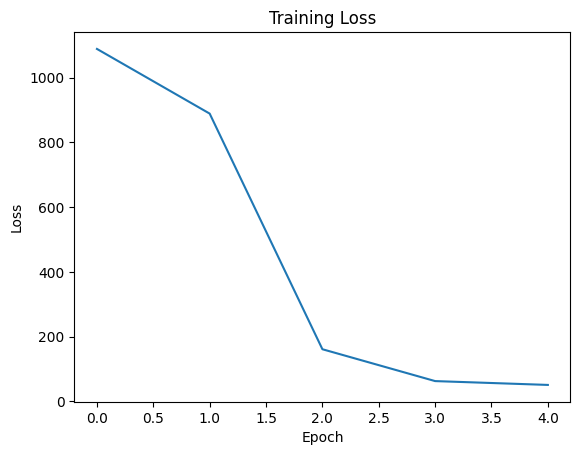

In [83]:
plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [84]:
X_test = np.asarray(X_test).astype("float32")
y_test = np.asarray(y_test).astype("float32")

In [85]:
y_pred = model.predict(X_test).reshape(-1, 1)
y_pred

29/29 [==============================] - 0s 788us/step


array([[27.373056],
       [29.930946],
       [26.847174],
       [30.494526],
       [35.93826 ],
       [35.291496],
       [29.967876],
       [33.71699 ],
       [36.740307],
       [30.044777],
       [30.650887],
       [31.84798 ],
       [32.076267],
       [36.385414],
       [31.141771],
       [28.56002 ],
       [32.969715],
       [30.991972],
       [33.17169 ],
       [38.391556],
       [27.748455],
       [28.031336],
       [31.111246],
       [28.539019],
       [34.152737],
       [31.432013],
       [28.440598],
       [36.9109  ],
       [28.681183],
       [33.46574 ],
       [34.427277],
       [28.759766],
       [31.303568],
       [32.134865],
       [28.692316],
       [34.98604 ],
       [31.071157],
       [36.93489 ],
       [31.227772],
       [29.319916],
       [28.14422 ],
       [30.51406 ],
       [33.715958],
       [26.583351],
       [35.71423 ],
       [32.78885 ],
       [37.661896],
       [31.543009],
       [31.61632 ],
       [33.314415],


In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

annMAR = mean_absolute_error(y_test, y_pred)
annMSR = mean_squared_error(y_test, y_pred)
print(annMAR)
print(annMSR)

5.491877
42.54743


In [87]:
to_predit = X_train[0].reshape(-1, X_train.shape[1])

In [88]:
model.predict(to_predit)

1/1 [==============================] - 0s 17ms/step


array([[30.084465]], dtype=float32)

In [89]:
from sklearn.linear_model import LinearRegression

mlrModel = LinearRegression()
mlrModel.fit(X_train, y_train)

LinearRegression()

In [90]:
mlr_ypred = mlrModel.predict(X_test)

In [91]:
mlr_MAR = mean_absolute_error(y_test, mlr_ypred)
mlr_MSR = mean_squared_error(y_test, mlr_ypred)
print(mlr_MAR)
print(mlr_MSR)

2.8418808
11.7935915


In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [97]:
dtr_ypred = dtr.predict(X_test)

In [98]:
dtr_ypred

array([37.        , 32.40000153, 34.29999924, 33.40000153, 40.70000076,
       35.59999847, 34.79999924, 32.79999924, 35.70000076, 36.59999847,
       36.20000076, 22.89999962, 33.20000076, 38.09999847, 33.5       ,
       34.5       , 36.79999924, 32.70000076, 21.89999962, 22.10000038,
       35.79999924, 33.29999924, 33.90000153, 34.90000153, 24.10000038,
       33.90000153, 33.70000076, 41.29999924, 34.29999924, 33.90000153,
       38.        , 32.09999847, 36.5       , 31.89999962, 37.09999847,
       37.59999847, 22.70000076, 38.59999847, 35.90000153, 33.20000076,
       32.79999924, 34.09999847, 40.5       , 35.20000076, 22.39999962,
       35.        , 21.70000076, 36.40000153, 35.        , 32.09999847,
       34.20000076, 33.79999924, 34.59999847, 25.70000076, 33.59999847,
       32.29999924, 32.40000153, 31.29999924, 33.90000153, 33.90000153,
       37.20000076, 24.29999924, 33.29999924, 34.29999924, 31.        ,
       36.        , 31.70000076, 33.59999847, 36.        , 42.90

In [103]:
mean_absolute_error(y_test, dtr_ypred)
mean_squared_error(y_test, dtr_ypred)

7.955595739505286

In [99]:
comp = np.concatenate(
    (
        y_test.reshape(len(y_test), 1),
        mlr_ypred.reshape(len(y_pred), 1),
        y_pred.reshape(len(y_pred), 1),
        dtr_ypred.reshape(len(y_pred), 1),
    ),
    1,
)

In [101]:
comparison = pd.DataFrame(
    comp, columns=["ytest", "mlr_ypred", "ann_ypred", "dtr_ypred"]
).to_csv("model comparison.csv")

In [104]:
import joblib

In [106]:
joblib.dump("dtr.bin", filename="final_model/dtr.bin")

['final_model/dtr.bin']